# 第四章
## フリーデータを用いた実際の前処理
本章では先に紹介したライブラリを使い、実際のデータに対して前処理を行います。  
使用するデータは歴史的にも有名な難破船タイタニック号への乗客者の生存状況を示す表形式のデータです。  
タイタニック号が沈没しても生還した乗客が一定数いましたが、とあるグループの人々は他のグループよりも  
生き残る可能性が高かったようです。  
このデータからどのような人々が生き残る可能性が高いのか予測をするために前処理を実践していきます。  

## 前処理とは
データの分析結果にゆがみがある状態のデータを使うと分析結果も歪んできてしまい、品質の低下を招いてしまいます。  
例えばヒストグラムなどで他の多くの値から大きく外れている値がそもそもの誤りである場合と誤りはなく正しい値が  
偶然に発生した場合の2パターンが考えられます。  
その値を正しい値に修正するのか、そのまま使うのかで分析結果に影響を及ぼす可能性もあるのでデータに応じて  
対応を決めていく必要があります。値が欠損している場合も同様です。  
前処理には予め決められた処理順序や手段はないため、データを観察して特性を把握し変数同士の相関や値の分布を可視化、  
実際のデータに応じたデータ加工をすることが求められます。
よって、本書では実際の前処理の一例として紹介するものになります。

### データ内の各変数説明
survived：生死（１＝生存、０＝死亡）  
pclass：チケットクラス（１＝上級、２＝中級、３＝下級）  
sex：性別  
age：年齢  
sibsp：同乗している兄弟/配偶者の数  
parch：同乗している親/子の数  
fare：乗船料金  
embarked：出港地（C=Cherbourg、S=Southampton、Q=Queenstown）  
class：客室ランク  
who：性別  
adult_male：成人男性であるかどうか（True＝成人男性、False＝成人男性以外）  
deck：乗船していたデッキ（First=上級、Second＝中級、Third＝下級）  
embarck_town：出港地  
alive：生死（no=０、yes=１）  
alone：一人であったかどうか  

### フリーデータのセット
はじめに必要なライブラリをインポートします。

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
%matplotlib inline  
plt.style.use('ggplot')  
import warnings  
warnings.filterwarnings('ignore')

インポートしたPythonのデータライブラリであるseabornからtitanicのデータを読み込みます。

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### データの観察
扱うデータの準備ができたので、まずはデータを加工するためにデータを観察します。  
これまでの章でも説明してきたグラフによる可視化や欠損値への対処などいずれの処理をするにも  
データの規模、データ型、重複した情報の有無など様々なことを考慮する必要があります。  
従って、様々な視点でデータを観察していきます。  

#### 行、列数の確認
printでセットしたデータを指定してデータの中身の抜粋と行列数を確認します。  
行列数のみを確認するにはshapeを使います。

In [5]:
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [6]:
print(titanic.shape)

(891, 15)


#### データ型の確認
info()を使うことでデータ型と各列のデータが欠損していない数を確認します。 
列ごとのデータ型のみを確認するにはdtypesを使います。  

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

adult_male列、alone列がbool型となっています。  
alone列は一人か否かですが、adult_male列は成人男性か否かであり、成人の定義が何歳以上か確認しておきます。

In [55]:
titanic[titanic["adult_male"]==True]["age"].min()

16.0

adult_maleの最年少は16歳であることから16歳以上が成人と定義しています。  
データの整合性を検査するためにもadult_male列がtrueの行でsex列にfemaleが含まれていないか確認しておきます。

In [56]:
sum(titanic[titanic["adult_male"]==True]["sex"]=="female")

0

sex列にfemaleが含めれているレコードが0件であることが確認できました。  
つまりはadult_male列はage列とsex列の情報と重複したものであることが分かります。

#### 統計量の確認
describe()を使うことでデータ全体の統計量を確認します。  
データ型によって統計が取れないものもありますが、出現頻度の高いものや上限下限値を把握します。  
describe()だけでは上位の列しか表示されないので、先に確認した列数に応じてinclude='all'を指定します。

In [9]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### ユニークな要素の確認
value_counts()を使うことでユニークな要素の個数とそれぞれの要素の出現回数を取得できます。  
デフォルトでは出現回数が多いものから降順ソートされますが、sort=Falseを指定するとソートがされなくなります。

In [66]:
titanic.value_counts()

survived  pclass  sex     age   sibsp  parch  fare      embarked  class  who    adult_male  deck  embark_town  alive  alone
1         1       female  24.0  0      0      69.3000   C         First  woman  False       B     Cherbourg    yes    True     2
                          58.0  0      0      26.5500   S         First  woman  False       C     Southampton  yes    True     1
                          49.0  0      0      25.9292   S         First  woman  False       D     Southampton  yes    True     1
                                1      0      76.7292   C         First  woman  False       D     Cherbourg    yes    False    1
                          50.0  0      1      247.5208  C         First  woman  False       B     Cherbourg    yes    False    1
                                                                                                                              ..
                          16.0  0      0      86.5000   S         First  woman  False       B     Sout

In [67]:
titanic.value_counts(sort=False)

survived  pclass  sex     age   sibsp  parch  fare      embarked  class  who    adult_male  deck  embark_town  alive  alone
0         1       female  2.0   1      2      151.5500  S         First  child  False       C     Southampton  no     False    1
                          25.0  1      2      151.5500  S         First  woman  False       C     Southampton  no     False    1
                          50.0  0      0      28.7125   C         First  woman  False       C     Cherbourg    no     True     1
                  male    18.0  1      0      108.9000  C         First  man    True        C     Cherbourg    no     False    1
                          19.0  1      0      53.1000   S         First  man    True        D     Southampton  no     False    1
                                                                                                                              ..
1         3       female  4.0   1      1      16.7000   S         Third  child  False       G     Sout

#### 欠損値の確認
info()を使ってデータ型を確認した時にデータが欠損していない数を参照できましたが、今回はisnull()を使い各列の欠損値の個数を確認します。

In [10]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

deck列が8割近くのレコード数が欠損していることが確認できます。
age列も2割程度のレコードが欠損していますが、他の欠損値がある列は平均値や最頻値などで補完ができそうです。

#### 相関係数の確認
corr()を使うことで各列の間の相関係数が算出されます。
1に近いほど「正の相関があり」-1に近いほど「負の相関がある」という関係になります。

In [12]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


seaborn.heatmapメソッドを使うことで色の濃淡や色相でデータの可視化するので見やすくなります。
肌色に近いほど正の相関を表し、黒色に近いほど負の相関を表します。

<AxesSubplot:>

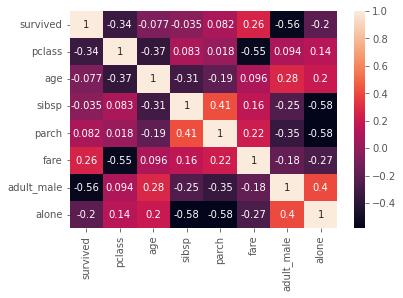

In [16]:
sns.heatmap(titanic.corr(), annot=True)

この結果からsibsp列とparch列やadult_male列とalone列には正の相関がありそうで、  
pclass列とfare列やsurvived列とadult_male列には負の相関がありそうなことが分かります。

### データの加工
ここまでのデータ観察で目的としている予測に対して手がかりとなる情報が少しずつ見えてきました。  
* 予測目的である生死には関係がないデータありそう
* 似たデータが格納された列がありそう
* 欠損値があるのでデータの補完が必要そう
* 欠損値が8割もあるdeck列の情報は使えなさそう

など様々な気付きがあるかと思います。  
ここからはデータを解析するにあたって可視化を目指して、目的に対して不要なデータがあると  
必要な情報が埋もれてしまう可能性があるのでデータの加工をしていきます。  

#### データの削除
データ観察を踏まえて、必要のない列をdropで削除します。

In [12]:
tita=titanic.drop(["deck","alive","who",],axis=1)
tita

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,True,Cherbourg,True


#### 欠損値の補完
可視化やデータ解析に備えてデータ観察で確認した欠損値を補完していきます。
欠損値があることでデータ解析の手法によってはそのデータを扱えない場合があります。
より正確な値を補完することが理想ですが、簡単な手法で補完します。

In [13]:
tita.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
adult_male       0
embark_town      2
alone            0
dtype: int64

age列のデータ型はfloat64なので欠損は平均値で補完してみます。


In [14]:
tita["age"] = tita["age"].fillna(tita["age"].mean())
tita.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
adult_male     0
embark_town    2
alone          0
dtype: int64

age列の欠損値が無くなりました。
embarked列とembark_town列はobject型なので最頻値で補完していきます。  
value_counts()を使い、各列の出現データと最頻値を確認します。

In [15]:
print(tita["embarked"].value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64


In [16]:
print(tita["embark_town"].value_counts())

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


この結果からembarked列とembark_town列のデータは同一データが格納されていることが判明しました。  
可視化にあたってデータの重複は除外しておくべきなのでembarked列は最頻値の"S"で補完、embark_town列は削除します。

In [17]:
tita.fillna({"embarked":"S"},inplace=True)

In [18]:
print(tita["embarked"].value_counts())

S    646
C    168
Q     77
Name: embarked, dtype: int64


In [19]:
tita=tita.drop(["embark_town",],axis=1)

In [20]:
tita.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
adult_male    0
alone         0
dtype: int64

### データの可視化
数値や文字の羅列だけでは扱っているデータの特徴が掴み辛いです。  
各列におおよそどのようなデータがあるのかは見えてきましたが、具体的な値のバラつき、  


#### 箱ひげ図
データの分布やバラつきをグラフで表示します。  
統計量の確認で各列のサマリを見ましたが、ここでは具体的にfare列の箱ひげ図を見てみます。

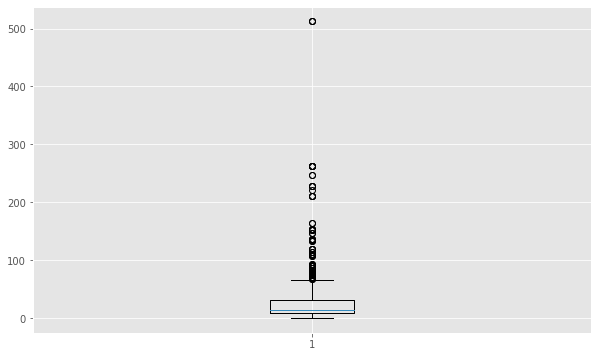

In [25]:
plt.figure(figsize=(10,6))
plt.boxplot(tita["fare"])
plt.show()

fare列の最大値が512であることは統計量の確認で分かっていましたが、第三四分位数からも大きく離れているので最大値の512は外れ値として扱うとよさそうです。  
同様にage列も箱ひげ図を見てみます。  
欠損値が多くあったので平均値≒29で補完したこともあり、中央値も平均値もほぼ同じように見えます。  
欠損値がある状態のデータでは箱ひげ図を表示することができないですが、他の値で補完すれば違った特徴に見える可能性もあるため、欠損値の扱いは慎重に行う必要があります。

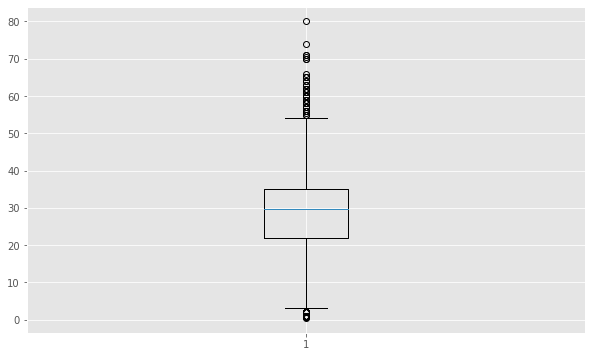

In [44]:
plt.figure(figsize=(10,6))
plt.boxplot(tita["age"])
plt.show()

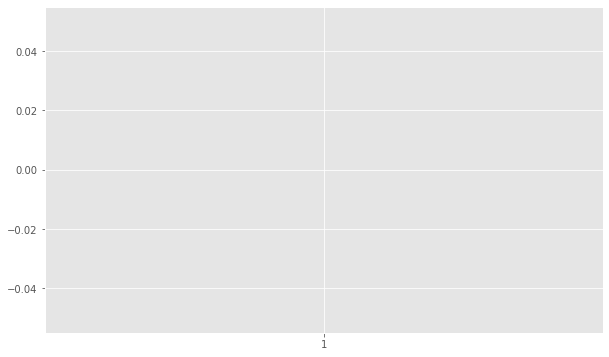

In [42]:
plt.figure(figsize=(10,6))
plt.boxplot(titanic["age"])
plt.show()

#### 棒グラフ
ここでもfare列の特性を深掘りしていきます。  
数値の高低差を具体的に見てみます。

<AxesSubplot:xlabel='fare', ylabel='Count'>

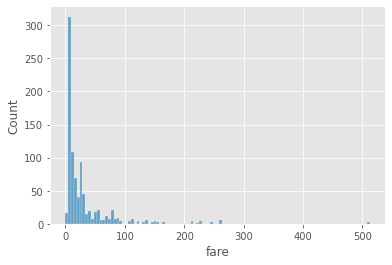

In [43]:
sns.histplot(tita['fare'])

中央値が≒15だったので棒グラフからも15近辺の値の個数が多いことがはっきり分かります。  
fare列が生死(survived列)にどのような関係があるかを見ていきます。  
データの観察からもfare列は小数で表現されているので、全ての値に対して生死を求めようにも組み合わせは無限にあります。  
よって、fare列を0～50、51～100のように50毎の範囲で区切り、区切られた範囲に対してのsurvived列の関係を見てみます。
今使っているデータをコピーして新たなデータを作り、新たなデータに対してFare_range列を追加していきます。  
fareが0～50の場合は1、51～100の場合は2をFare_range列に入力するfor文を実行します。

In [51]:
tita1 = tita.copy()
tita1['Fare_range']=np.nan
fare_range = [n * 50 for n in range(11)]
for idx, num in enumerate(fare_range):
    tita1.loc[tita1['fare'] >= num, 'Fare_range'] = idx

<AxesSubplot:xlabel='Fare_range', ylabel='Count'>

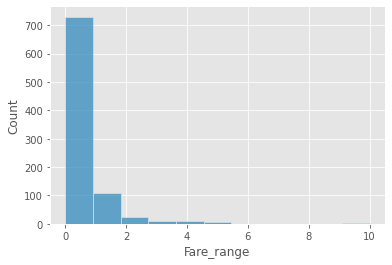

In [52]:
sns.histplot(tita1['Fare_range'])

そしてFare_rage列ごとのsurvived列の0と1の件数をcountした棒グラフを生成すると以下のようになります。

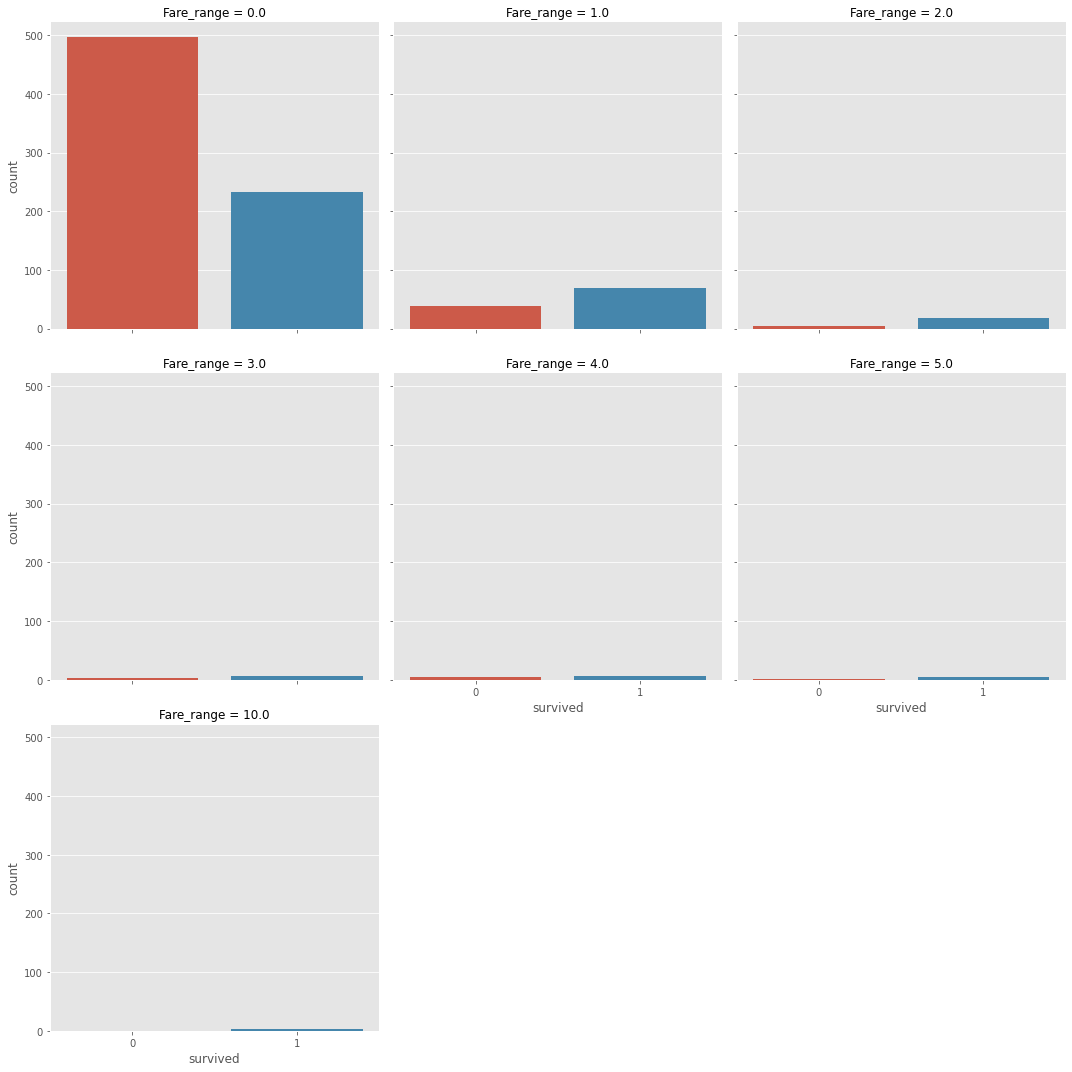

In [53]:
sns.catplot(x='survived', col='Fare_range', kind='count', data=tita1, col_wrap=3)

一見fareの数値が小さいほどsurvivedが0であることが多く、fareが50以上だとsurvivedが1であることが多いように見えます。  
ただ、fareが高いほどsurvivedが1になるとは言い切れないため、他の尺度で見る必要があります。  
そこで、男女別(sex列)での違いがあるのか先ほどのグラフにsex列の要素を追加してみます。

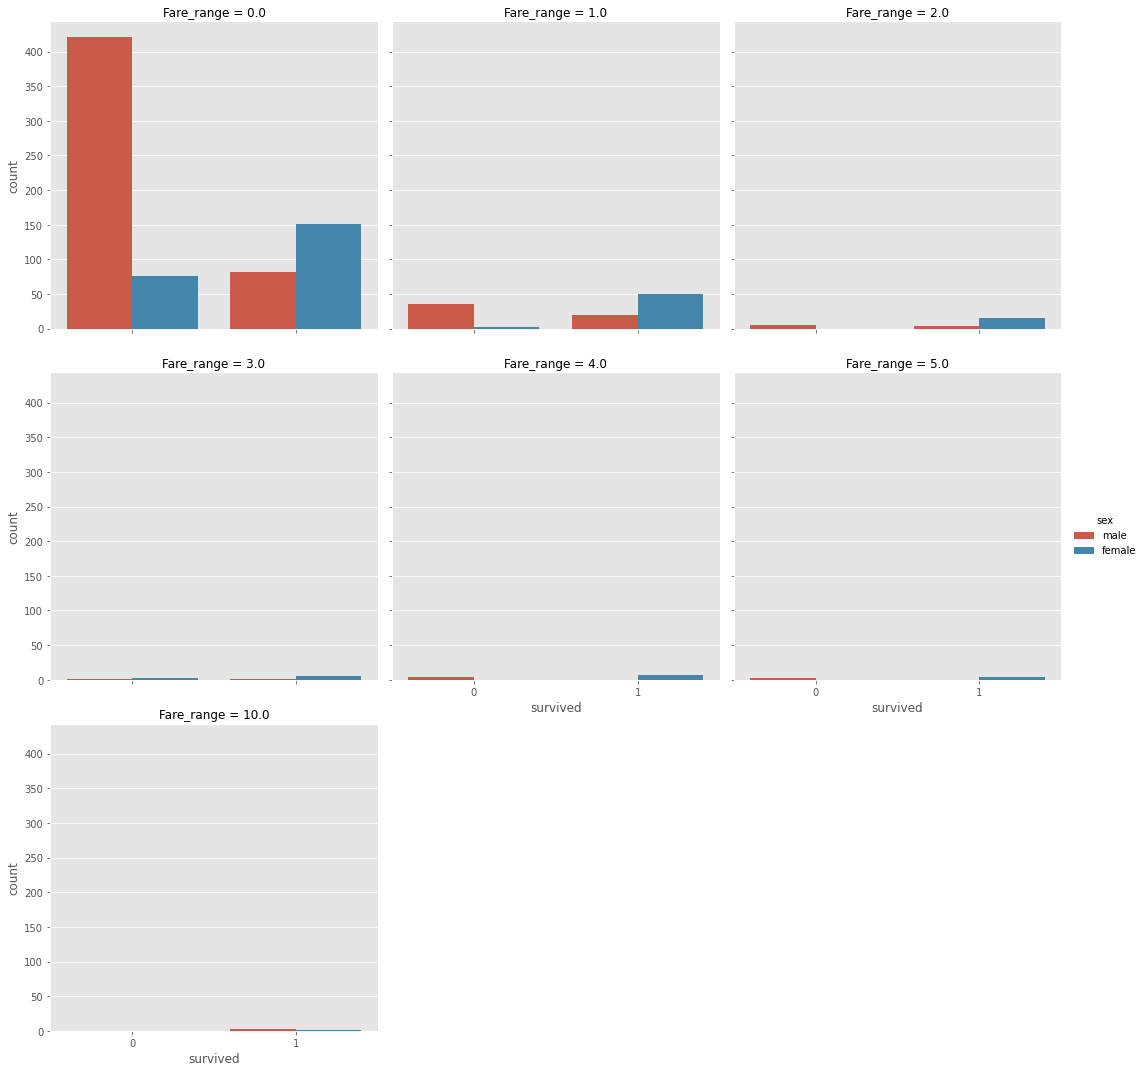

In [50]:
sns.catplot(x='survived', col='Fare_range', kind='count', hue='sex', data=tita1, col_wrap=3)

fareの値いずれでも、maleよりもfemaleがsurvivedが1であることの方が多いことが分かります。  
次は別の視点からembarked別のsurvivedを見てみます。

embarked   C   Q    S
survived             
0         75  47  427
1         93  30  219


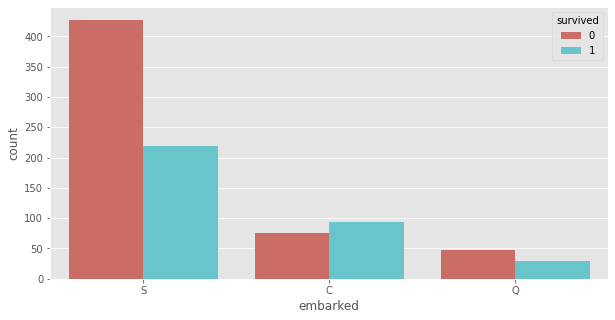

In [62]:
print(pd.crosstab(tita["survived"], tita["embarked"]))

plt.figure(figsize=(10,5))
sns.countplot(x="embarked", data=tita, hue="survived",palette="hls")

plt.show()

embarkedがSだとsurvivedが0になる割合が高く見えますが、他と比べて母数が4～5倍大きいのでは判断材料としては不足しているようにも思えます。
加えてclass別のsurvivedも見てみます。

class     First  Second  Third
survived                      
0            80      97    372
1           136      87    119


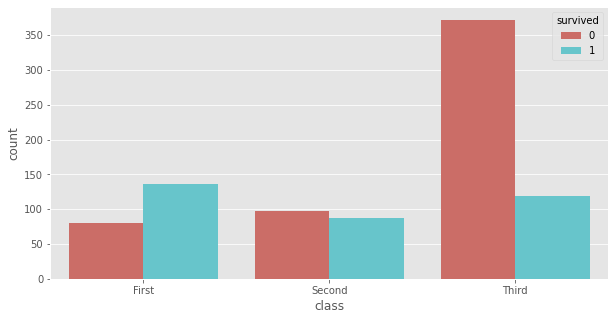

In [54]:
print(pd.crosstab(tita["survived"], tita["class"]))

plt.figure(figsize=(10,5))
sns.countplot(x="class", data=tita, hue="survived",palette="hls")

plt.show()

classがFirstまたはSecondだとsurvivedが1になる割合が高くなるように見えます。  
これもembarked列同様に母数の偏りがあるためThirdの場合だとsurvivedが0になるとは言い切れないです。

#### 散布図
列同士の関係性を見ていきます。  
棒グラフではその列における数値の偏りや割合を確認する上で効果的でしたが、2つ以上の列の関係性を確認するには散布図が適しています。  
今回は複数の変数をまとめて可視化する際に使われる散布図行列で可視化します。  
2変数同士の組み合わせで散布図を作成して行列にまとめて表すものです。

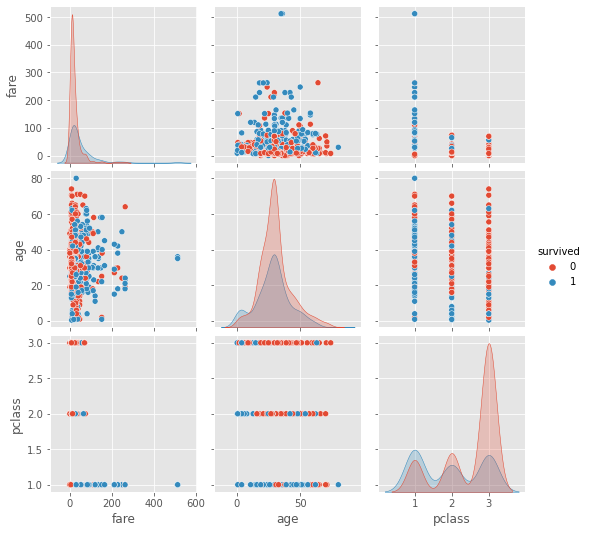

In [60]:
sns.pairplot(data=tita[["fare", "survived", "age", "pclass"]], hue="survived", dropna=True)

この散布図からは以下のようなことが見えてきます。  
* fareが100より大きいとpclassは1になり、survivedが1になる割合が多い模様  
* pclassが1～3いずれでもageが20未満だとsurvivedが1になる割合が多い模様  

このように棒グラフでは表れなかった情報が散布図では現れることがあるので、様々な手法で可視化することが必要です。

### ここまでのまとめ
ここまで簡単なデータの観察/加工/可視化をやってみることで今回使用したデータの特性が少し見えてきました。  

【見えてきた特性】  
- 元データのレコード数は891、カラム数は15、特定カラムにはデータの欠損がある
- 成人男性(adult_male列)は年齢(age列)が16以上、かつ性別(sex列)がmaleを指しているので重複した情報である
- 同乗している兄弟/配偶者の数(sibsp列)と同乗している親/子の数(parch列)に正の相関がありそう
- 成人男性(adult_male列)と一人であったか(alone列)に正の相関がありそう
- チケットクラス(pclass列)と乗船料金(fare列)に負の相関がありそう
- 生死(survived列)と成人男性(adult_male列)に負の相関がありそう
- 予測目的である生死には関係がない、欠損が多すぎて予測に使えない、または情報が重複したデータがある
 - 乗船していたデッキ(deck列)･･･レコード全体の8割が欠損している
 - 生死(alive列)･･･survived列と重複している
 - 性別(who列)･･･sex列と重複している
 - 出港地(embark_town列)･･･embarked列内の文字列の頭文字が格納され重複している
- 乗船料金(fare列)には外れ値512が存在、75パーセンタイルが31である
- 乗船料金(fare列)の数値が大きいと生還(survived列の値:1)した傾向がやや少しみられる
- 乗船料金(fare列)の数値がいずれであっても性別(sex列)が女性(female)だと生還した傾向がみられる
- 乗船料金(fare列)の数値が100以上だとチケットクラス(pclass列)が1となり生還した傾向がみられる
- チケットクラス(pclass列)がいずれで合っても年齢(age)が20以下だど生還した傾向か見られる
- 出港地(embarked列)がCまたはQだと生還した傾向がやや少し見受けられる
- 客室ランク(class列)がFirstまたはSecondだと生還した傾向がやや少しみられる  

今回実践紹介した以外にもデータには質的変数が含まれているので量的変数に変換して相関が取り直したり、  
欠損値への対処を他の手法で対応した場合に相関に変化が見られるか確認したりなど様々な尺度から前処理を  
行うことがより品質の高いデータ分析へとつながっていきます。